In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel,SequentialFeatureSelector
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.read_csv('titanic.csv')
df1

,Survived,Pclass,Sex,Age,Siblings.Spouses.Aboard,Parents.Children.Aboard,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
882,0,2,0,27.0,0,0,13.0000
883,1,1,1,19.0,0,0,30.0000
884,0,3,1,7.0,1,2,23.4500
885,1,1,0,26.0,0,0,30.0000


## a

In [ ]:
x, y = df1.values[:,1:], df1.values[:,0]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

## b

In [ ]:
m1 = LogisticRegression(penalty = 'none', max_iter= 1000)
m1.fit(x_train, y_train)
print(m1.score(x_test, y_test))
print(m1.coef_)

0.8277153558052435
[[-1.31025653e+00  2.64561969e+00 -4.24487684e-02 -3.50988353e-01
  -8.95191610e-02 -6.91844772e-04]]


## c

In [ ]:
selector = SelectFromModel(estimator=LogisticRegression(penalty = 'none')).fit(x_train, y_train)

In [ ]:
selector.estimator_.coef_

array([[-1.31025653e+00,  2.64561969e+00, -4.24487684e-02,
        -3.50988353e-01, -8.95191610e-02, -6.91844772e-04]])

In [ ]:
np.mean(abs(selector.estimator_.coef_))

0.739920724650954

In [ ]:
selector.threshold_

0.739920724650954

In [ ]:
print(selector.get_support()) #które zmienne są wybrane po selekcji, a które nie (wybieramy te których wartości bezwzględne współczynników są większe 
                              #od wartości bezwzględnej thresholdu)

[ True  True False False False False]


In [ ]:
x_train2 = selector.fit_transform(x_train, y_train)
x_test2 = selector.transform(x_test)

In [ ]:
m2 = LogisticRegression(penalty = 'none', max_iter= 1000).fit(x_train2, y_train)

In [ ]:
m2.score(x_test2,y_test)

0.8164794007490637

##d

In [ ]:
selector2 = SequentialFeatureSelector(estimator=LogisticRegression(penalty = 'none'))
selector2.fit(x_train, y_train)
selector2.get_support()

array([ True,  True, False,  True, False, False])

In [ ]:
x_train3 = selector2.transform(x_train)
x_test3 = selector2.transform(x_test)

In [ ]:
x_train3.shape


(620, 3)

In [ ]:
m3 = LogisticRegression(penalty = 'none', max_iter= 1000).fit(x_train3, y_train)
m1.fit(x_train3, y_train)
m1.score(x_test3, y_test)

0.7902621722846442

#10.2

In [ ]:
np.random.seed(123)
#a
# zbior
url = 'pima.csv'
dataframe = pd.read_csv(url,header=0)
print(dataframe)
data = dataframe.values
X, y = data[:,:-1], data[:, -1]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.7,test_size = 0.3) 

     times  glucose  blood  skin  insulin   BMI  pedigree  age  class
0        6      148     72    35        0  33.6     0.627   50      1
1        1       85     66    29        0  26.6     0.351   31      0
2        8      183     64     0        0  23.3     0.672   32      1
3        1       89     66    23       94  28.1     0.167   21      0
4        0      137     40    35      168  43.1     2.288   33      1
..     ...      ...    ...   ...      ...   ...       ...  ...    ...
763     10      101     76    48      180  32.9     0.171   63      0
764      2      122     70    27        0  36.8     0.340   27      0
765      5      121     72    23      112  26.2     0.245   30      0
766      1      126     60     0        0  30.1     0.349   47      1
767      1       93     70    31        0  30.4     0.315   23      0

[768 rows x 9 columns]


## b

Przed wykonaniem procedury PCA należy zestandaryzować dane!

In [ ]:
StandardScaler() #wykonuje standaryzacje danych (odejmujemy srednia i dzielimy przez odchylenie standardowe, dzieki temu są ulokowane wg rozkładu N(0,1))

StandardScaler()

In [ ]:
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train)
X_test2 = scaler.transform(X_test)

Teraz możemy przystąpić do PCA.

In [ ]:
pca = PCA().fit(X_train2)

In [ ]:
#komponenty
pca.components_

array([[ 0.04543539,  0.39069995,  0.34866528,  0.46827826,  0.46523685,
         0.45305527,  0.2663456 ,  0.10859462],
       [ 0.60007569,  0.19783585,  0.23280285, -0.26098377, -0.19828431,
        -0.03890584, -0.09298726,  0.65496831],
       [-0.05701538,  0.55709385, -0.46679756, -0.28908492,  0.36020635,
        -0.38828447,  0.31640051,  0.06559659],
       [-0.0579445 , -0.22827722,  0.05566128, -0.08909714, -0.36281231,
         0.08176629,  0.88739806,  0.08775907],
       [ 0.5481772 , -0.39014631, -0.5322577 ,  0.45365523,  0.20447503,
        -0.05906921,  0.09768893,  0.05782684],
       [ 0.01323738,  0.24030167, -0.52301302, -0.16959868, -0.29130951,
         0.73689269, -0.10598542, -0.02585663],
       [-0.5748441 , -0.1699269 , -0.20723605,  0.21997791,  0.03013871,
        -0.00826839, -0.10556441,  0.73295395],
       [ 0.01082858, -0.45488052,  0.05873292, -0.58149591,  0.59605118,
         0.29867762,  0.03014813,  0.07736377]])

In [ ]:
pca.explained_variance_

array([2.12975413, 1.72033435, 1.01708364, 0.90681391, 0.78155956,
       0.67572591, 0.41344868, 0.37020519])

In [ ]:
pca.explained_variance_ratio_

array([0.26572351, 0.21464134, 0.1268987 , 0.11314066, 0.09751302,
       0.08430845, 0.05158484, 0.04618947])

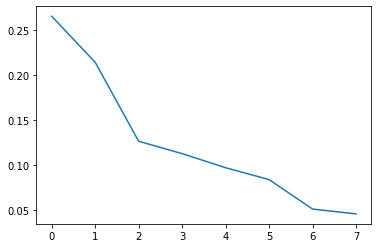

In [ ]:
plt.plot(pca.explained_variance_ratio_) # mówi nam jakk procent wariancji został objaśniony za pomocą pca (unowotowrzonych zmiennych), może to służyc do wyboru zmiennych tylko takich co wyjaśniają istotny odsetek wariancji

## c

In [ ]:
X_train_3 = pca.transform(X_train2)
X_test_3 = pca.transform(X_test2)

Ręcznie:

In [ ]:
X_train2@pca.components_.T

array([[ 0.48331904, -0.16408155, -0.8042853 , ..., -0.51257065,
         1.23654084,  0.89364597],
       [-1.47469983, -0.19844529,  0.17766589, ...,  0.84581617,
        -0.55123642,  0.13525606],
       [ 1.35284147,  2.7770311 , -0.35237892, ...,  0.07987999,
         0.71620612, -1.32263849],
       ...,
       [-0.45377905, -1.43677049,  1.36065196, ..., -0.73433486,
        -0.41418933,  0.80750754],
       [-0.19342528, -0.43427905, -0.23150697, ...,  0.36626093,
        -0.04226663,  0.05367319],
       [-0.46537706,  2.01680135, -1.25682181, ..., -0.43300883,
        -0.29313835, -0.27263634]])

## d

In [ ]:
m2 = LogisticRegression(penalty = 'none')

In [ ]:
m2.fit(X_train2, y_train)
m2.score(X_test2, y_test)

0.8008658008658008

In [ ]:
m2.fit(X_train_3, y_train)
m2.score(X_test_3, y_test)

0.8008658008658008

In [ ]:
m2.fit(X_train_3[:,0:7], y_train)
m2.score(X_test_3[:,0:7], y_test)

0.8051948051948052

In [ ]:
m2.fit(X_train_3[:,0:2], y_train)
m2.score(X_test_3[:,0:2], y_test)

0.7359307359307359